# Ⅰ.Import Libraries

In [1]:
# data analysis and wrangling
import os
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tpot import TPOTClassifier
from sklearn.model_selection import  cross_val_score, StratifiedKFold

C:\Users\Yan3\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


# Ⅱ.Data Collection

In [2]:
# import data
base = "titanic"
files = {"test":"test.csv","train":"train.csv",
              
        }
def file_path(string):
    return os.path.join(base,files[string])

train_df = pd.read_csv(file_path("train"))
test_df = pd.read_csv(file_path("test"))


# Ⅲ.Basic Exploratory Analysis

#### make  clear explanations for serveral important features(variables):
#### Pclass: A proxy for socio-economic status (SES), 1st = Upper,2nd = Middle,3rd = Lower
#### SibSp: The dataset defines family relations in this way: Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored) 
#### parch: The dataset defines family relations in this way: Parent = mother, father Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
#### embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
#### And the dependent variable in train dataset is Survival: 1 means survive, 0 means dead.


In [3]:
# firstly, have a glance of data

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# all variables' name
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### From above, we could recognize our variables' type: 
####  numerical and categorical
####  Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
#### Numerical : Continous variables: Age, Fare. Discrete variables: SibSp, Parch.

In [5]:
# Now we could view how many missing data and data types in our dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# Make sure our predict target
IDtest = test_df["PassengerId"]

In [8]:
# And a better idea is to have a big picture of whole dataset
# Join train and test datasets in order to obtain the same number of features during categorical conversion
dataset =  pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### From above, we find there are many missing data in Age and Cabin variables, which means we need to solve this in following analysis.

In [9]:
### Summarize data
# Summarie and statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Ⅳ.Feature Analysis

### 1. Numerical features(variables)

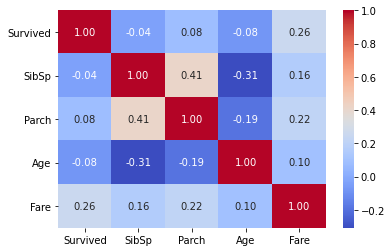

In [10]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#### Only Fare feature seems to have a significative correlation with the survival probability.
#### It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

### SibSP

C:\Users\Yan3\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Yan3\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


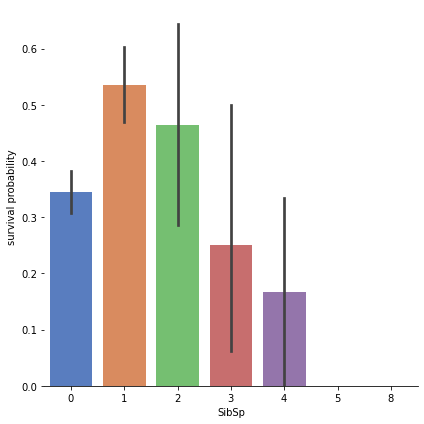

In [11]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

### Parch

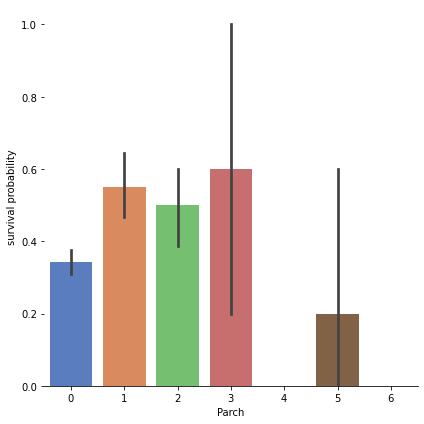

In [12]:
# Explore Parch feature vs Survived
f  = sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted")
f.despine(left=True)
f = f.set_ylabels("survival probability")

### Age

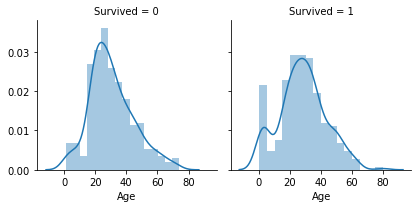

In [13]:
# Explore Age vs Survived
h = sns.FacetGrid(train_df, col='Survived')
h = h.map(sns.distplot, "Age")

#### Age distribution seems to be a tailed distribution, maybe a Normal distribution.

#### So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

#### It seems that very young passengers have more chance to survive.

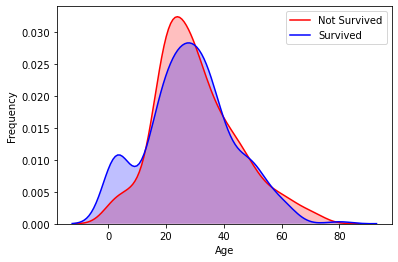

In [14]:
# Explore Age distibution 
j = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 0) & (train_df["Age"].notnull())], color="Red", shade = True)
j = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 1) & (train_df["Age"].notnull())], ax =j, color="Blue", shade= True)
j.set_xlabel("Age")
j.set_ylabel("Frequency")
j = j.legend(["Not Survived","Survived"])

#### Now, we cleary see a peak correponsing (between 0 and 5) to babies and very young childrens.

### Fare

#### From the basic explantory, we could find there is one misssing data in fare features. In machine learning, we always use imputation to solve missing data problem. And for this variable, imputing median is a plausible idea.

In [15]:
#Fill Fare missing values with the median value
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

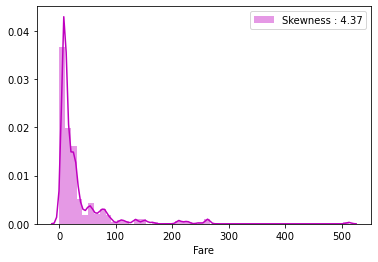

In [16]:
# Explore Fare distribution 
q = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
q = q.legend(loc="best")

#### As we  see, Fare distribution is very skewed. This can lead to overweigth very high values in the model, even if it is scaled.

#### In this case, it is better to transform it with the log function to reduce this skew.

In [17]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

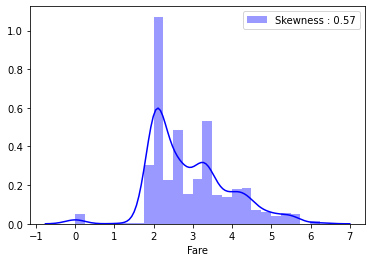

In [18]:
# plot the new distribution
p = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()))
p = p.legend(loc="best")

#### Wow, see, log transformation does make bell shape!

### 2. categorical features(variables)

### Sex

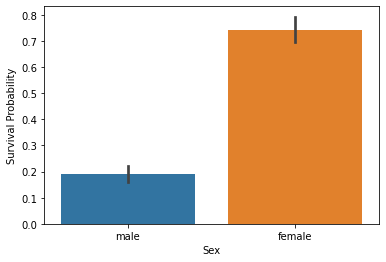

In [19]:
# make a bar plot
g = sns.barplot(x="Sex",y="Survived",data=train_df)
g = g.set_ylabel("Survival Probability")

#### From this plot, It is clearly obvious that Male have less chance to survive than Female.

#### So Sex, might play an important role in the prediction of the survival.

### Pclass

C:\Users\Yan3\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Yan3\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


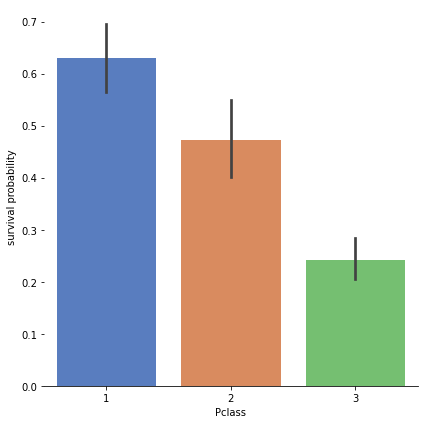

In [20]:
# Explore Pclass vs Survived
p = sns.factorplot(x="Pclass",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted")
p.despine(left=True)
p = p.set_ylabels("survival probability")

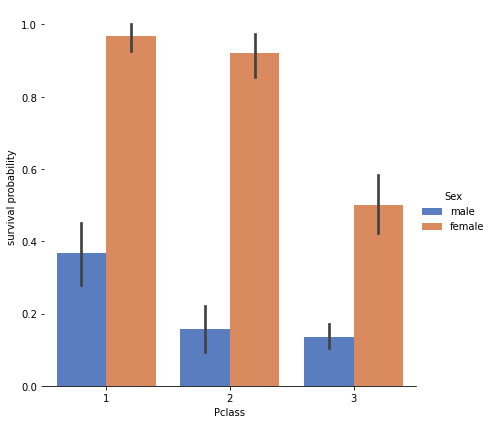

In [21]:
# Explore Pclass vs Survived by Sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

####  First class passengers have more chance to survive than second class and third class passengers.

#### This trend is conserved when we look at both male and female passengers. And again, female has larger possibilities to survive.

### Embarked

In [22]:
dataset["Embarked"].isnull().sum()

2

In [23]:
dataset["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

#### From above, we find 2 missing value in Embark features, and "S" is the most frequent value in Emabark, thus impute "S" for missing value.

In [24]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")

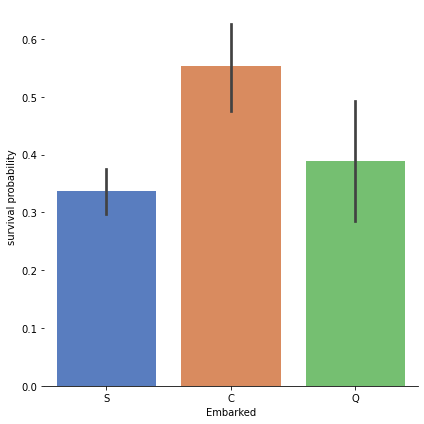

In [25]:
# Explore Embarked vs Survived 
k = sns.factorplot(x="Embarked", y="Survived",  data=train_df,
                   size=6, kind="bar", palette="muted")
k.despine(left=True)
k = k.set_ylabels("survival probability")

#### We find passenger coming from Cherbourg (C) have more chance to survive.


## Ⅴ.Feature Engineering

#### Feature engineering is an very important step in machine learning that creates more high-corralated variables for models.

In [26]:
# Firstly, We need to fill missing values in age variables by imputing median

dataset["Age"] = dataset["Age"].fillna(dataset["Age"].median())

### Name/Title

In [27]:
# take a look at 
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### The Name feature contains information on passenger's title.
#### Since some passenger with distingused title may be preferred during the evacuation, it is interesting to add them to the model.

In [28]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

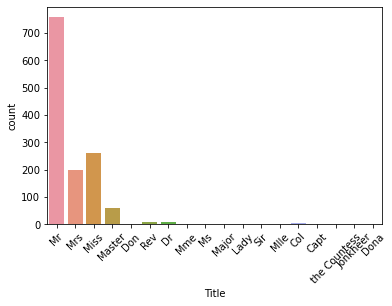

In [29]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

#### There is 17 titles in the dataset, most of them are very rare and we can group them in 4 categories.

In [30]:
# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)


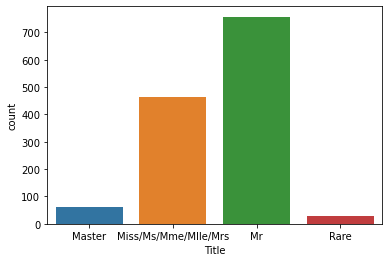

In [31]:
# Make a nice bar plot of four group count
g = sns.countplot(dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

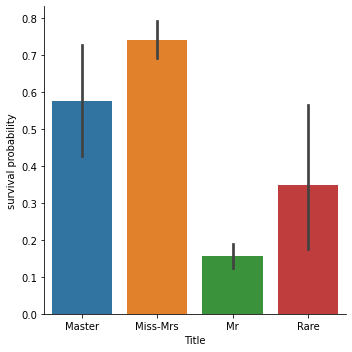

In [32]:
# And it is interesting to explore the relation between survival and title
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

#### Wow, another amazing finding is people with rare names have more chances to survive than men with title Mr!

In [33]:
# And now, we coulf drop variable "name" since we already made good use of it.
dataset.drop(labels = ["Name"], axis = 1, inplace = True)


In [34]:
# convert to indicator values Title and Embarked 
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,1.981001,NaN,0,0,1,0,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,4.266662,C85,0,1,0,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,0,1,0,0,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,3.972177,C123,0,1,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,2.085672,NaN,0,0,1,0,0,0,1


In [35]:
dataset.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Em_C', 'Em_Q', 'Em_S'], dtype=object)

#### Now, we have 17 features in dataset.

### Cabin

In [36]:
# At first have a look at "cabin"
dataset["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [37]:
dataset["Cabin"].isnull().sum()

1014

In [38]:
dataset.count()

PassengerId    1309
Survived        891
Pclass         1309
Sex            1309
Age            1309
SibSp          1309
Parch          1309
Ticket         1309
Fare           1309
Cabin           295
Title_0        1309
Title_1        1309
Title_2        1309
Title_3        1309
Em_C           1309
Em_Q           1309
Em_S           1309
dtype: int64

In [39]:
#### The Cabin feature column contains 292 values and 1007 missing values.
#### We supposed that passengers without a cabin have a missing value displayed instead of the cabin number.
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [40]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

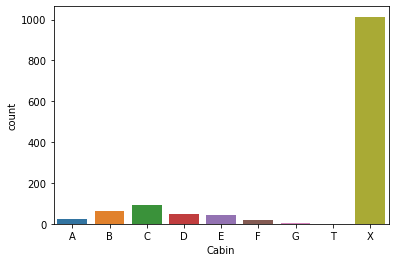

In [41]:
# Similiar as last feature, we make a bar plot for encoded feature
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

C:\Users\Yan3\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


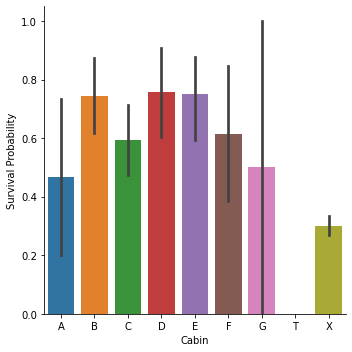

In [42]:
# And do not forget survial vs cabin
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

In [43]:
# encoding our "Cabin" feature to numerical values
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

### Ticket

In [44]:
# Repeat what we did before
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [45]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [46]:
# encoding our "Ticket" feature to numerical values
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [47]:
# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})
dataset.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,1,0.0,0,22.0,1,0,1.981001,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,1,38.0,1,0,4.266662,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,1,26.0,0,0,2.070022,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,1,35.0,1,0,3.972177,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,0,35.0,0,0,2.085672,0,0,1,...,0,0,0,0,0,0,1,0,0,1


# Ⅵ.Modeling

In [48]:
# Drop useless variables 
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [49]:
## Separate train dataset and test dataset
train_len = len(train_df)
train_df = dataset[:train_len]
test_df = dataset[-(len(dataset)-train_len):]
test_df = test_df.drop(["Survived"],axis = 1)



In [50]:
## Separate train features and label(dependent variables) 

train_df["Survived"] = train_df["Survived"].astype(int)
Y_train = train_df["Survived"]
X_train = train_df.drop(labels = ["Survived"],axis = 1)

<ipython-input-50-645ba24e03e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Survived"] = train_df["Survived"].astype(int)


In [51]:
### 数据规范化
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std =scaler.transform(X_train)
X_test = scaler.transform(test_df)  

## Cross Validation model

#### We compared several classifiers  and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.
#### SVC
#### Decision Tree
#### KNN
#### Logistic regression
#### TPOT

In [52]:
# 构造SVM
clf_SMC= SVC()
# SVM训练
clf_SMC.fit(X_train_std, Y_train)
# SVM预测
pred_labels = clf_SMC.predict(X_test)
# 得到SVM准确率(基于训练集)
acc_SMC = round(clf_SMC.score(X_train_std, Y_train), 6)
print(u'score准确率为 %.4lf' % acc_SMC)
# 使用K折交叉验证 统计SVM准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf_SMC, X_train_std, Y_train, cv=10)))

score准确率为 0.8507
cross_val_score准确率为 0.8227


In [53]:
# 构造ID3决策树
clf_CART = DecisionTreeClassifier(criterion='entropy')
# 决策树训练
clf_CART.fit(X_train_std, Y_train)
# 决策树预测
pred_labels = clf_CART.predict(X_test)
# 得到决策树准确率(基于训练集)
acc_decision_tree = round(clf_CART.score(X_train_std, Y_train), 6)
print(u'score准确率为 %.4lf' % acc_decision_tree)
# 使用K折交叉验证 统计决策树准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf_CART, X_train_std, Y_train, cv=10)))

score准确率为 0.9888
cross_val_score准确率为 0.8037


In [54]:
# 构造KNN决策树
clf_KNN= KNeighborsClassifier()
# KNN训练
clf_KNN.fit(X_train_std, Y_train)
# KNN预测
pred_labels = clf_KNN.predict(X_test)
# 得到KNN准确率(基于训练集)
acc_KNN = round(clf_KNN.score(X_train_std, Y_train), 6)
print(u'score准确率为 %.4lf' % acc_KNN)
# 使用K折交叉验证 统计KNN准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf_KNN, X_train_std, Y_train, cv=10)))

score准确率为 0.8586
cross_val_score准确率为 0.8025


In [55]:
# 构造逻辑回归
clf_LR= LogisticRegression()
# 逻辑回归训练
clf_LR.fit(X_train_std, Y_train)
# 逻辑回归预测
pred_labels = clf_LR.predict(X_test)
# 得到逻辑回归准确率(基于训练集)
acc_LR = round(clf_LR.score(X_train_std, Y_train), 6)
print(u'score准确率为 %.4lf' % acc_LR)
# 使用K折交叉验证 统计逻辑回归准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf_LR, X_train_std, Y_train, cv=10)))

score准确率为 0.8406
cross_val_score准确率为 0.8126


In [ ]:
# 构造TPOT
clf_TPOT= TPOTClassifier()
# TPOT训练
clf_TPOT.fit(X_train, Y_train)
# 得到tpot准确率(基于训练集)
acc_TPOT = round(clf_TPOT.score(X_train, Y_train), 6)
print(u'score准确率为 %.4lf' % acc_TPOT)
# 使用K折交叉验证 统计逻辑回归准确率
print(u'cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf_TPOT, X_train, Y_train, cv=10)))

score准确率为 0.9540
